In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [21]:
#Read the data
df = pd.read_csv('../solutions/galaxyquasar.csv')

In [22]:
df

,u,g,r,i,z,class,z1,zerr
0,18.97213,18.53676,18.58280,18.34936,18.29215,QSO,0.522819,0.000155
1,19.24592,17.47646,16.47817,16.04472,15.68851,GALAXY,0.122846,0.000028
2,19.43536,17.70268,16.91565,16.58327,16.39128,GALAXY,0.000000,0.000000
3,19.31626,18.18312,17.39591,16.94549,16.65395,GALAXY,0.147435,0.000009
4,19.28828,19.11188,18.88937,18.80013,18.49183,QSO,2.011455,0.000631
...,...,...,...,...,...,...,...,...
49995,19.37295,18.12382,17.39886,16.98503,16.70585,GALAXY,0.113016,0.000011
49996,18.52021,16.88262,16.03280,15.56884,15.22454,GALAXY,0.085063,0.000014
49997,18.62718,17.30876,16.87371,16.62399,16.42296,GALAXY,0.054429,0.000008
49998,19.55140,18.27711,17.62101,17.21947,17.03347,GALAXY,0.112571,0.000009


In [23]:
# Create arrays for the (u - g), (g - r), (r - i), (i - z)
ug = df['u'] - df['g']
gr = df['g'] - df['r']
ri = df['r'] - df['i']
iz = df['i'] - df['z']

In [24]:
# Create an array with the class labels where galaxy = 0 and quasar = 1
labels = np.zeros(np.size(df, 0))
labels[df['class'] == 'QSO'] = 1

In [25]:
#Create a pandas dataframe with the colours and the labels
data = {'ug': ug, 'gr': gr, 'ri': ri, 'iz': iz, 'class': labels}
df_colours = pd.DataFrame(data) 
print(df_colours)

            ug       gr       ri       iz  class
0      0.43537 -0.04604  0.23344  0.05721    1.0
1      1.76946  0.99829  0.43345  0.35621    0.0
2      1.73268  0.78703  0.33238  0.19199    0.0
3      1.13314  0.78721  0.45042  0.29154    0.0
4      0.17640  0.22251  0.08924  0.30830    1.0
...        ...      ...      ...      ...    ...
49995  1.24913  0.72496  0.41383  0.27918    0.0
49996  1.63759  0.84982  0.46396  0.34430    0.0
49997  1.31842  0.43505  0.24972  0.20103    0.0
49998  1.27429  0.65610  0.40154  0.18600    0.0
49999  1.05021  0.35251  0.18850  0.09355    0.0

[50000 rows x 5 columns]


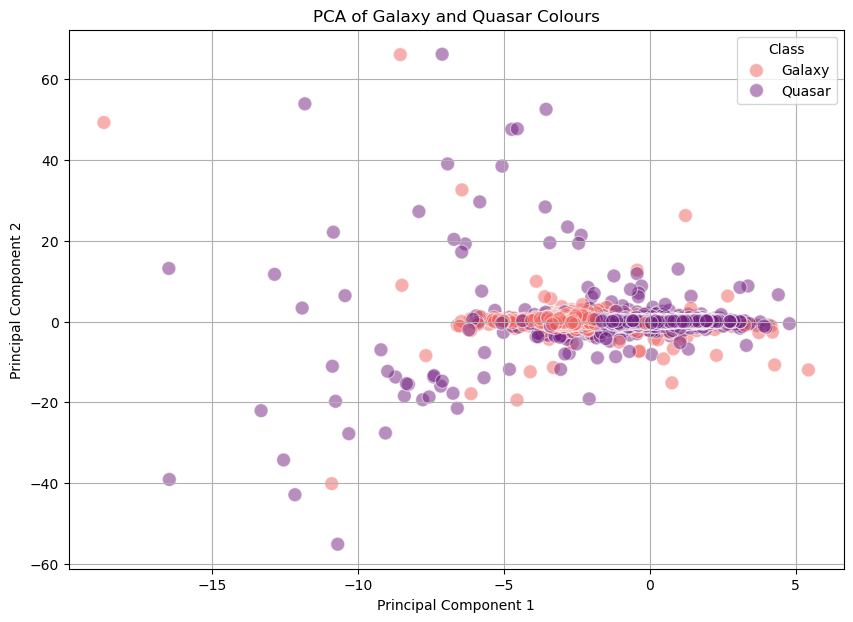

In [26]:
#Quick PCA exploration

scaler = StandardScaler()
X = scaler.fit_transform(df_colours.drop(columns=['class']))

pca = PCA(n_components=2)

proj_X = pca.fit_transform(X)

#Plot the PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=proj_X[:, 0], y=proj_X[:, 1], hue=df_colours['class'], palette='magma', s=100, alpha = 0.5)
plt.title('PCA of Galaxy and Quasar Colours')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class', labels=['Galaxy', 'Quasar'])
plt.grid()
plt.show()



Clearly 2 components don't distinguish the objects well

In [27]:
#How many features are needed to explain 99.5% of the variance?
pca995 = PCA(n_components=0.995)
pca995.fit(X)
print("{:d} features are needed to explain 99.5% of the variance".format(pca995.n_components_))

4 features are needed to explain 99.5% of the variance


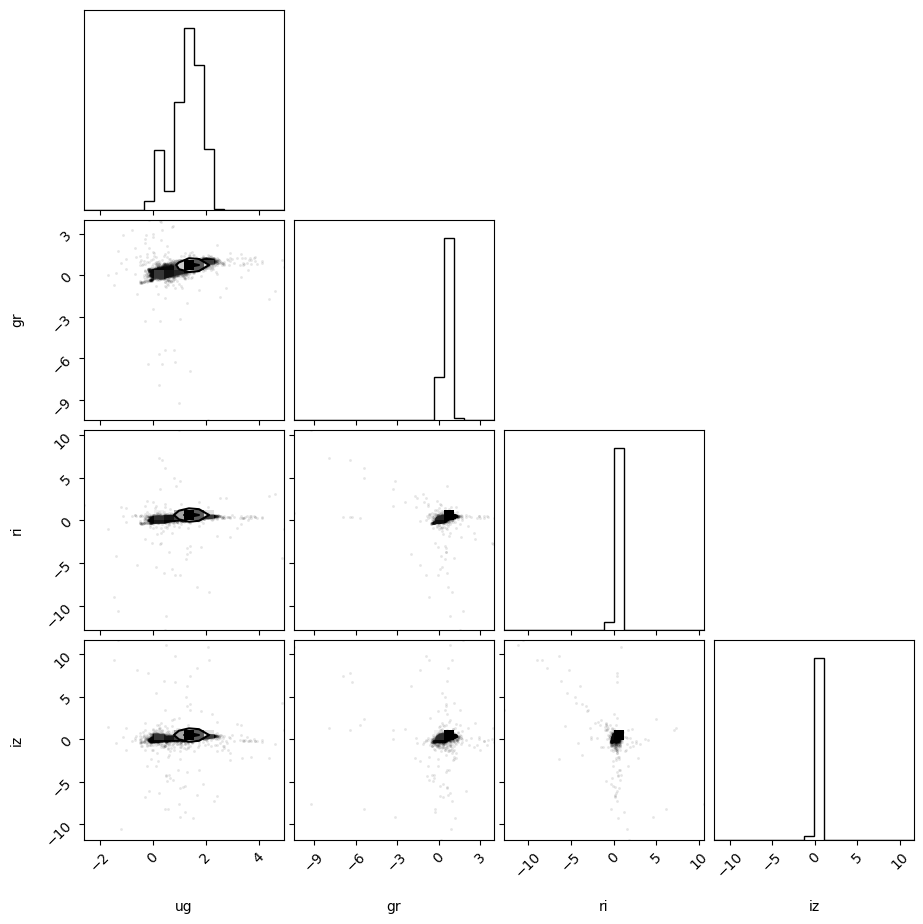

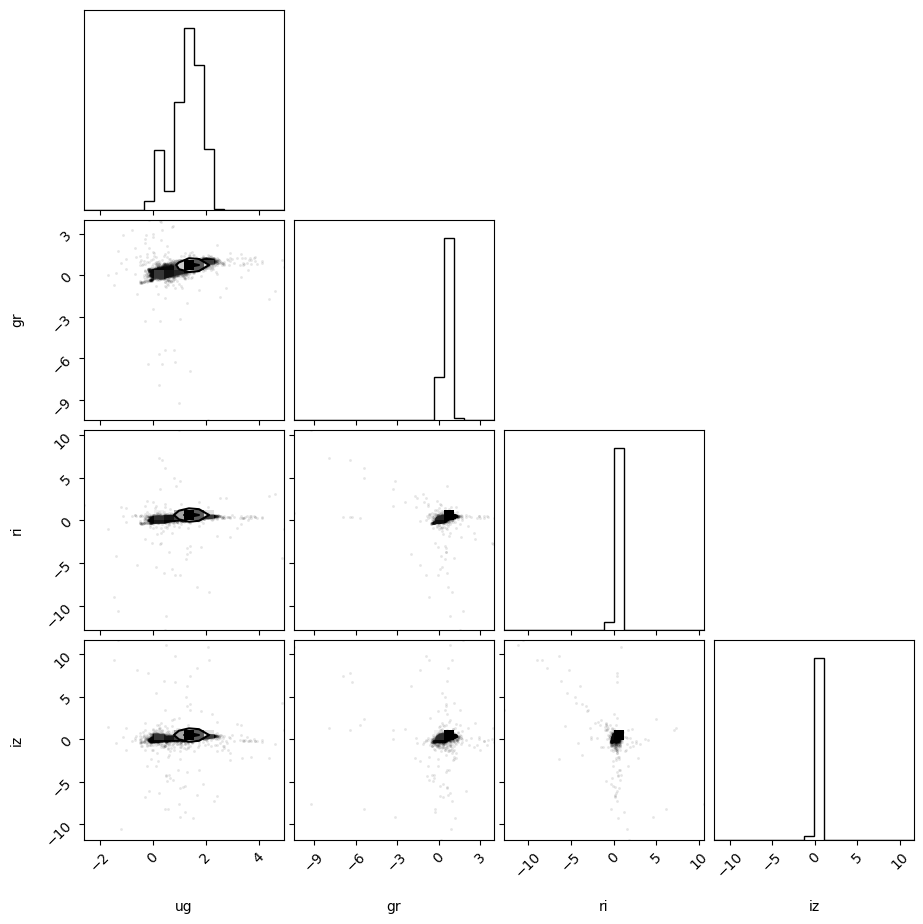

In [28]:
#Let's visualise the data distribution
import corner
corner.corner(np.array([df_colours['ug'],df_colours['gr'],df_colours['ri'],df_colours['iz']]).T, labels=['ug', 'gr', 'ri', 'iz'])

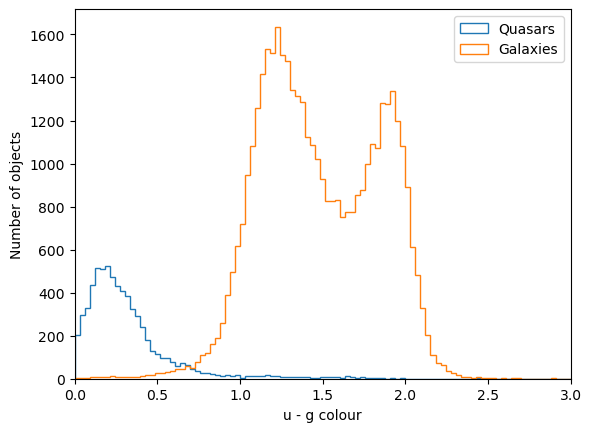

In [29]:
#Check the bimoddality in the ug colour
plt.hist(df_colours['ug'][labels == 1],histtype='step',bins=np.linspace(0,3,100), label='Quasars')
plt.hist(df_colours['ug'][labels == 0],histtype='step',bins=np.linspace(0,3,100), label='Galaxies')
plt.xlim(0,3)
plt.xlabel('u - g colour')
plt.ylabel('Number of objects')
plt.legend()
plt.show()

# Classifiers

In [30]:
#Prepare data
X = df_colours[['ug', 'gr', 'ri', 'iz']].values
y = df_colours['class'].values

In [31]:
import sklearn.model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from astroML.classification import GMMBayes
from sklearn.neighbors import KNeighborsClassifier

In [32]:
#Split the data into training and test sets and standardise them
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Gaussian naive Bayes

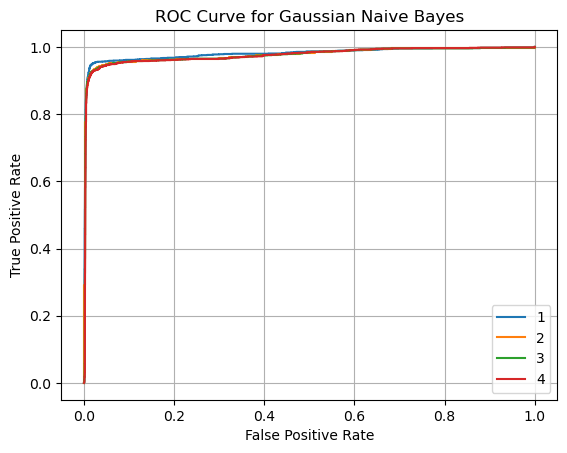

In [ ]:
#Plot the ROC curve for Gaussian Naive Bayes using 1, 2, 3 and 4 features
clf = GaussianNB()

for i in range(4):

    clf.fit(X_train[:,0:i+1] ,y_train )

    y_prob = clf.predict_proba(X_test[:,0:i+1]) [:,1] 
    
    
    fpr, tpr, thresh = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=str(i+1))
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gaussian Naive Bayes')
plt.grid()
plt.show()

(40000, 1)
(40000, 2)
(40000, 3)
(40000, 4)


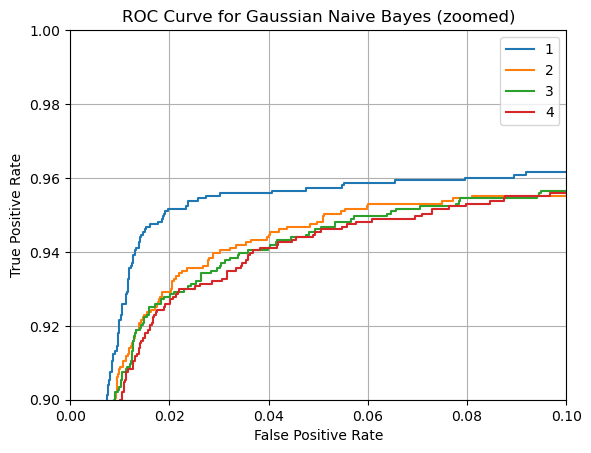

In [ ]:
#Zoom in on the top-left corner of the ROC curve

for i in range(4):

    print( X_train[:,0:i+1].shape )

    clf.fit(X_train[:,0:i+1] ,y_train )

    y_prob = clf.predict_proba(X_test[:,0:i+1]) [:,1] 
    
    fpr, tpr, thresh = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=str(i+1))
plt.legend()
plt.xlim(0,0.1)
plt.ylim(0.9,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gaussian Naive Bayes (zoomed)')
plt.grid()
plt.show()

## Quadratic discriminant analysis

(40000, 1)
(40000, 2)
(40000, 3)
(40000, 4)


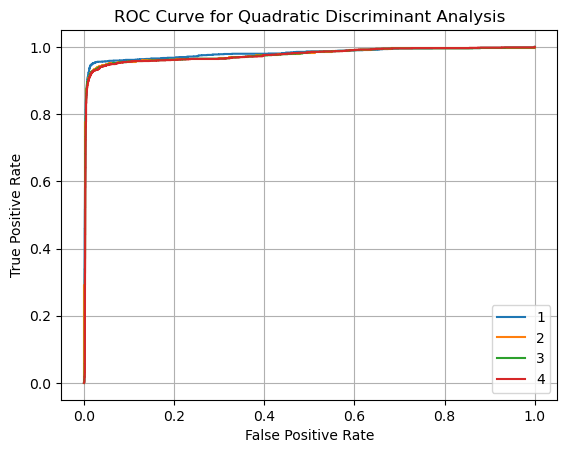

In [ ]:
#Plot the ROC curve for Quadratic Discriminant Analysis using 1, 2, 3 and 4 features
cfl = QuadraticDiscriminantAnalysis()

for i in range(4):

    print( X_train[:,0:i+1].shape )
    clf.fit(X_train[:,0:i+1] ,y_train )
    y_prob = clf.predict_proba(X_test[:,0:i+1]) [:,1] 
    fpr, tpr, thresh = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=str(i+1))
    
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Quadratic Discriminant Analysis')
plt.grid()
plt.show()

(40000, 1)
(40000, 2)
(40000, 3)
(40000, 4)


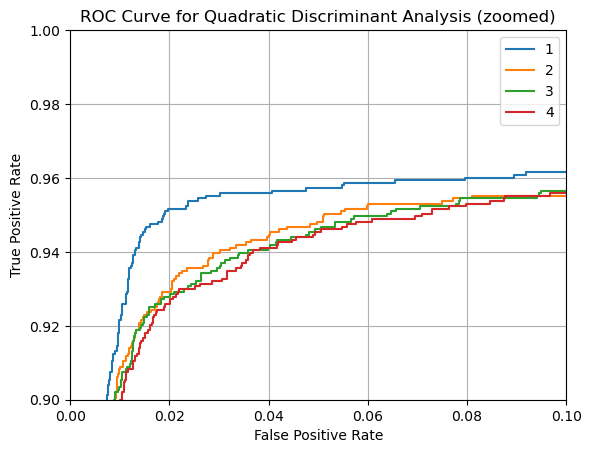

In [ ]:
#Zoom in on the top-left corner of the ROC curve

for i in range(4):

    print( X_train[:,0:i+1].shape )

    clf.fit(X_train[:,0:i+1] ,y_train )

    y_prob = clf.predict_proba(X_test[:,0:i+1]) [:,1] 
    
    fpr, tpr, thresh = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=str(i+1))
plt.legend()
plt.xlim(0,0.1)
plt.ylim(0.9,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Quadratic Discriminant Analysis (zoomed)')
plt.grid()
plt.show()

## GMMBayes

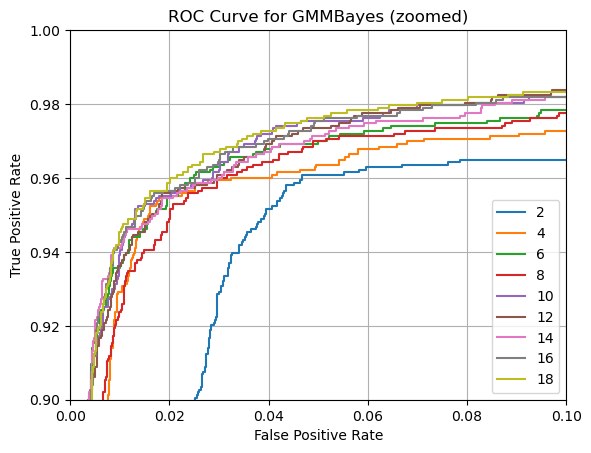

In [ ]:
#Plot the ROC curve for GMMBayes using an even number of components from 2 to 18
for n in np.arange(2,20)[::2]:
    
    clf = GMMBayes(n_components=n)
    clf.fit(X_train[:,0:4],y_train)
    
    y_prob = clf.predict_proba(X_test[:,0:4]) [:,1] 
        
    fpr, tpr, thresh = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=str(n))

plt.legend()
plt.xlim(0,0.1)
plt.ylim(0.9,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GMMBayes (zoomed)')
plt.grid()
plt.show()

## K-neighbors

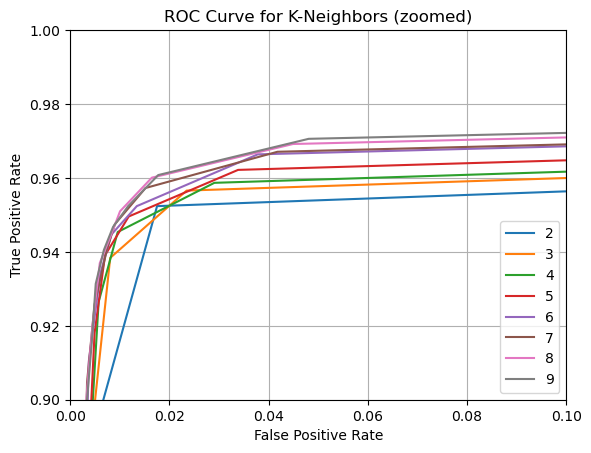

In [ ]:
#Plot the ROC curve for K-Neighbors using an odd number of neighbors from 2 to 9
for n in np.arange(2,10):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train[:,0:4],y_train)
    
    y_prob = clf.predict_proba(X_test[:,0:4]) [:,1] 
        
    fpr, tpr, thresh = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=str(n))

plt.legend()
plt.xlim(0,0.1)
plt.ylim(0.9,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for K-Neighbors (zoomed)')
plt.grid()
plt.show()